## Import Required Modules

We would start by importing all the libraries required in the exercise. We import pandas as we would be reading csv files as DataFrames. We are importing LabelEncoder from sklearn.preprocessing package. LabelEncoder is a utility class to convert non-numerical labels to numerical labels. In this exercise we are predicting prognosis using symptoms so it is a classification task. We will be using RandomForestClassifier which consists of a large number of individual decision trees that operate as an ensemble. We also require classification report and accuracy score metrics to measure the performance of the model.

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Mount Drive

Mount Drive to the colab notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read CSV files from Drive

We are using this dataset from kaggle </br>
https://www.kaggle.com/kaushil268/disease-prediction-using-machine-learning

It contains 2 files Training.csv and Testing.csv containing training and testing data respectively. You can download these files by going data section of the above link.

Read csv files into dataframe using pandas read_csv() function. It reads comma-seperated files at provided filepath into dataframe. It takes filepath as parameter so make sure to provide the right filepath where you have downloaded the files.

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Data Science Dojo/Blogs/Healthcare and AI/Training.csv")
test = pd.read_csv("/content/drive/MyDrive/Data Science Dojo/Blogs/Healthcare and AI/Testing.csv")

## Check Samples of Training Dataset

To check how the data look like lets grab the first 5 rows of the dataframe using .head() function. 

We have 133 features. We want to predict prognosis so it would be our target variable and rest of 132 features are symptoms that a person experiences. These 132 symptoms feature would be used by classifier to predict possible prognosis. 

In [4]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
with pd.option_context("display.max_rows", 10, "display.max_columns", 10):
    display(train.head())

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,...,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,...,0,0,0,0,Fungal infection
1,0,1,1,0,0,...,0,0,0,0,Fungal infection
2,1,0,1,0,0,...,0,0,0,0,Fungal infection
3,1,1,0,0,0,...,0,0,0,0,Fungal infection
4,1,1,1,0,0,...,0,0,0,0,Fungal infection


The training set contain 4920 samples and 133 features as we can see by the shape attribute of the dataframe.

In [6]:
train.shape

(4920, 133)

## Descriptive Analysis

Description of the data in the dataframe can be seen by .describe() method of the dataframe. We can see that there are no missing values in our dataframe as the count of all the features is 4920 which is also the number of samples in our dataframe. We observe one more thing that the all the numeric features are binary and have value of either 1 or 0.

In [7]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
with pd.option_context("display.max_rows", 10, "display.max_columns", 8):
    display(train.describe())

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,...,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,...,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,...,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000


In [9]:
train.describe(include=['object'])

,prognosis
count,4920
unique,41
top,Fungal infection
freq,120


Our target variable prognosis has 41 unique values so there are 41 possible diseases in which the model would be classifying. There are 120 samples for each unique prognosis in our dataset.

In [10]:
train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

## All Symptoms

There are 132 symptom features in our dataset. The names of the symptoms are listed below.

In [11]:
possible_symptoms = train[train.columns.difference(['prognosis'])].columns
print(list(possible_symptoms))

['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic _patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'fluid_overload.1', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', 'irritability', 'irri

## All Unique Prognosis

There are 41 unique prognosis in our dataset. The name of all possible prognosis are listed below

In [12]:
list(train['prognosis'].unique())

['Fungal infection',
 'Allergy',
 'GERD',
 'Chronic cholestasis',
 'Drug Reaction',
 'Peptic ulcer diseae',
 'AIDS',
 'Diabetes ',
 'Gastroenteritis',
 'Bronchial Asthma',
 'Hypertension ',
 'Migraine',
 'Cervical spondylosis',
 'Paralysis (brain hemorrhage)',
 'Jaundice',
 'Malaria',
 'Chicken pox',
 'Dengue',
 'Typhoid',
 'hepatitis A',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Alcoholic hepatitis',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia',
 'Dimorphic hemmorhoids(piles)',
 'Heart attack',
 'Varicose veins',
 'Hypothyroidism',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Osteoarthristis',
 'Arthritis',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Acne',
 'Urinary tract infection',
 'Psoriasis',
 'Impetigo']

## Visualize Data

In [13]:
new_df = train[train.columns.difference(['prognosis'])]

Maximum Symptoms present for a Prognosis

In [14]:
new_df.sum(axis=1).max()

17

Minimum Symptoms present for a Prognosis

In [15]:
new_df.sum(axis=1).min()

3

## Symptoms which appear most often

In [16]:
series = new_df.sum(axis=0).nlargest(n=15)

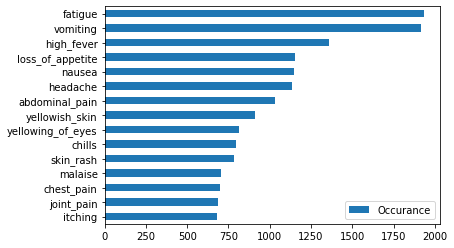

In [17]:
pd.DataFrame(series, columns=["Occurance"]).loc[::-1, :].plot(kind="barh")

Fatigue and vomiting are the most symptoms most often observed.

## Encode Object Prognosis

Our target variable is categorical feature.

Creating an instance of LabelEncoder and fitting it with prognosis column of train as well as test data so all the possible categorical values arre encoded in numerical value.

In [18]:
label_encoder = LabelEncoder()
label_encoder.fit(pd.concat([train['prognosis'], test['prognosis']]))

LabelEncoder()

In [19]:
train.sample(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alcoholic hepatitis
2972,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis B
1453,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis D
4654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis C
4402,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria


## Training Random Forest Classifier on training dataset

In [20]:
random_forest = RandomForestClassifier()
random_forest.fit(train[train.columns.difference(['prognosis'])], label_encoder.fit_transform(train['prognosis']))

RandomForestClassifier()

## Prediction

In [21]:
y_pred = random_forest.predict(test[test.columns.difference(['prognosis'])])

## Evaluation

In [22]:
y_true = label_encoder.fit_transform(test['prognosis'])
print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=test['prognosis']))

Accuracy: 1.0
                                         precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                                   GERD       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                          Drug Reaction       1.00      1.00      1.00         1
                    Peptic ulcer diseae       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                              Diabetes        1.00      1.00      1.00         1
                        Gastroenteritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                          Hypertension        1.00      1.00      1.00         1
             

## Predict Prognosis by taking symptoms as input

This function takes symptoms as input and predict the prognosis as output

In [23]:
def predict_prognosis():
  print("List of possible Symptoms you can enter: ", list(train[train.columns.difference(['prognosis'])].columns))
  input_symptoms = list(input("\nEnter symptoms space separated: ").strip().split())
  print(input_symptoms)
  test_value = []
  for symptom in train[train.columns.difference(['prognosis'])].columns:
    if symptom in input_symptoms:
      test_value.append(1)
    else:
      test_value.append(0)
  np_test = np.array(test_value).reshape(1, -1)
  encoded_label = random_forest.predict(np_test)
  predicted_label = label_encoder.inverse_transform(encoded_label)[0]
  print("Predicted Prognosis: ", predicted_label)

In [24]:
predict_prognosis()

List of possible Symptoms you can enter:  ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic _patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'fluid_overload.1', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irr

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
